In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Solver import chebyshev_shifted, plot_graphics, print_table, solve_examples

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
def example_4_problem():
    """
    Example 4: y(t) = e^-t^2 + t^2 - 1 + 3/e^(3/2-1) * integral
    Exact solution: y(t) = e^-t^2
    """
    def nonlinear_function(cos_t, s_j_tensor, y_s):
        return (cos_t/cos_t)*((1 - s_j_tensor**2) / (y_s)**(3/2))
    def exact_solution(t):
        return np.exp(-t**2)
    return nonlinear_function, exact_solution


def cheb4(t_array):
    is_scalar = np.isscalar(t_array)
    t = np.atleast_1d(t_array)
    results = np.zeros_like(t)
    for i, t_val in enumerate(t):
        T0 = chebyshev_shifted(t_val, 0)
        T1 = chebyshev_shifted(t_val, 1)
        T2 = chebyshev_shifted(t_val, 2)
        T3 = chebyshev_shifted(t_val, 3)
        T4 = chebyshev_shifted(t_val, 4)
        T5 = chebyshev_shifted(t_val, 5)
        T6 = chebyshev_shifted(t_val, 6)
        T7 = chebyshev_shifted(t_val, 7)
        T8 = chebyshev_shifted(t_val, 8)
        denominator = (2.05274512 * T0 + 1.55948378 * T1 + 6.40936981e-1 * T2 + 1.71343242e-1 * T3 + 4.51098769e-2 * T4 + 9.64618429e-3 * T5 + 1.98955908e-3*T6 + 3.71310219e-4*T7 + 6.30175218e-5*T8)**(2/3)
        results[i] = 1.0 / denominator
    return results[0] if is_scalar else results


--- Solving Example 4 ---


  0%|          | 0/1000 [00:00<?, ?it/s]

Loss = 1.5530942227e-08: 100%|██████████| 1000/1000 [02:55<00:00,  5.70it/s]


Starting L-BFGS optimization...
Training completed in 175.69 seconds
Final Loss: 1.5477138258e-08


Using features ['x0']
Compiling Julia backend...
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           76     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54771D-08    |proj g|=  9.93628D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   76      0      1      0     0     0   9.936D-08   1.548D-08
  F =   1.5477138257923780E-008

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


[ Info: Started!



Expressions evaluated per second: 6.780e+04
Progress: 590 / 800 total iterations (73.750%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.034e-01  3.604e+01  y = x0
2           4.104e-02  2.001e+00  y = 0.74619
4           9.319e-03  7.412e-01  y = 1.2462 - x0
5           3.551e-03  9.649e-01  y = exp(0.1575 - x0)
6           6.340e-23  3.604e+01  y = exp(1.5736e-11 - square(x0))
10          4.553e-23  8.280e-02  y = exp((exp(cube(x0)) * 1.3779e-11) - square(x0))
11          4.281e-23  6.164e-02  y = exp((exp(cube(square(x0))) * 1.5734e-11) - square(x0))
12          2.914e-23  3.845e-01  y = exp(square(exp(cube(cube(x0))) * -3.712e-06) - square(...
                                      x0))
15          2.914e-23  2.408e-05  y = exp(square(exp(cube(cube(x0)) * 0.99026) * -3.712e

[ Info: Final population:
[ Info: Results saved to:



Symbolic Approximation:
y(t) = e^{- x_{0}^{2} + 1.3778895808318829 \cdot 10^{-11} e^{2 x_{0}^{9}}}


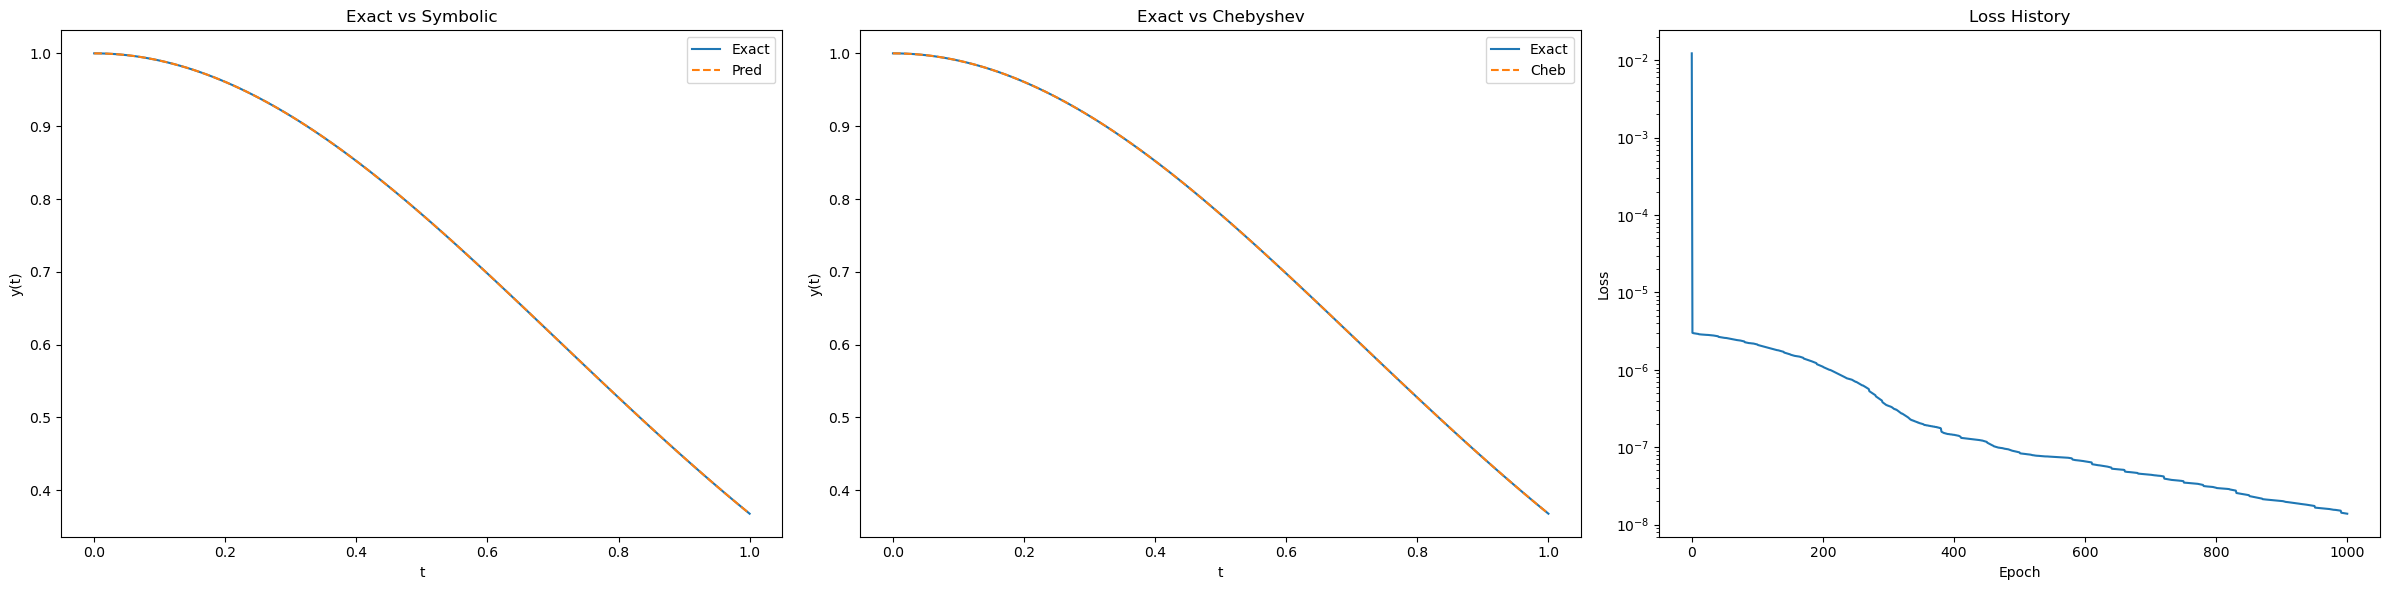

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|t	 |Exact				 |Symbolic			 |Sym Abs err			 |Chebyshev			|Cheb Abs err		 |Win|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.0	 |1.00000000000000000000 	 |1.00000000001377897796 	 |0.00000000001377897796	 |0.99999997467146739538 	|0.00000002532853260462	 |Yes|
|0.1	 |0.98984883393613065650 	 |0.98984883394976974635 	 |0.00000000001363908986	 |0.99004420479560295565 	|0.00019537085947229915	 |Yes|
|0.2	 |0.96000943924253856476 	 |0.96000943925576642801 	 |0.00000000001322786325	 |0.96079670824690355246 	|0.00078726900436498770	 |Yes|
|0.3	 |0.91226262481631548162 	 |0.91226262482888598182 	 |0.00000000001257050020	 |0.91393244763341774384 	|0.00166982281710226221	 |Yes|
|0.4	 |0.84937996544343319361 	

In [3]:
res = solve_examples(example_4_problem, idx="4", num_operator=["exp", "cube", "square"])
plot_graphics(res, 4, cheb4)
print_table(cheb4, res, 4)

Symbolic Output:
$$y(t) = e^{t^{2} + 1.3778895808318829 \cdot 10^{-11} e^{2 t^{9}}}$$